In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('hotel_bookings (1).csv')

In [ ]:
data.shape

(119390, 32)

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


UNIVARIATE ANALYSIS

Percentage cancelation=  0.37041628277075134
reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Reservation status VS Cancellations')

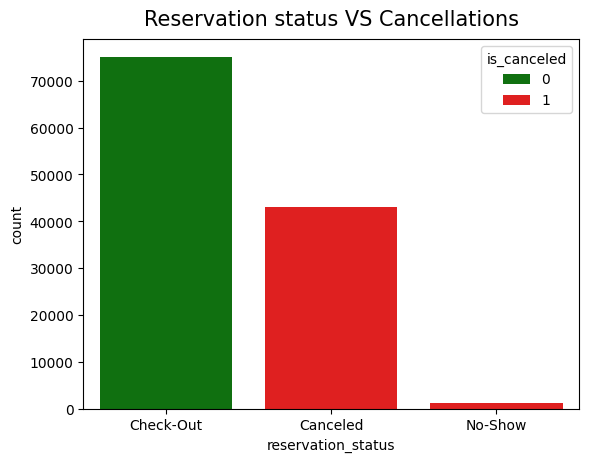

In [ ]:
is_can = len(data[data['is_canceled'] == 1])

print("Percentage cancelation= ", is_can / len(data))
cancellation_types = data['reservation_status'].value_counts(normalize = True) * 100
print(cancellation_types)

sns.countplot(data = data, x = 'reservation_status', hue = 'is_canceled',palette={0: 'green', 1: 'red'})
plt.title("Reservation status VS Cancellations", fontsize = 15, pad = 10)

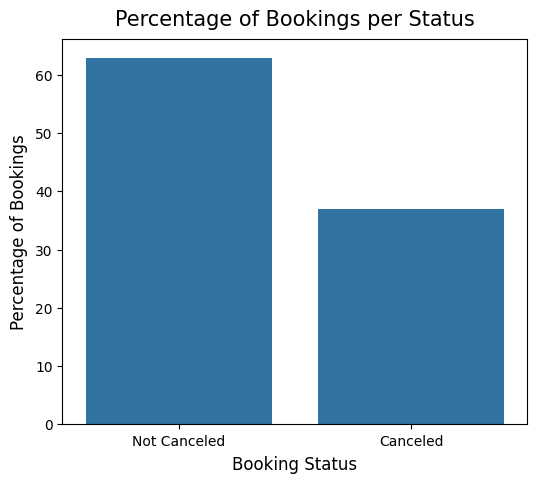

In [ ]:
#Visualizing the percentage of canceled vs not canceled bookings:
plt.figure(figsize=(6,5))
plt.title("Percentage of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True)*100)
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [ ]:
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculating correlation and sorting by 'is_canceled'
corr = numeric_data.corr(method='pearson')['is_canceled'][1:].sort_values(ascending=False)
print(corr)


lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


Text(70.5815972222222, 0.5, 'Features')

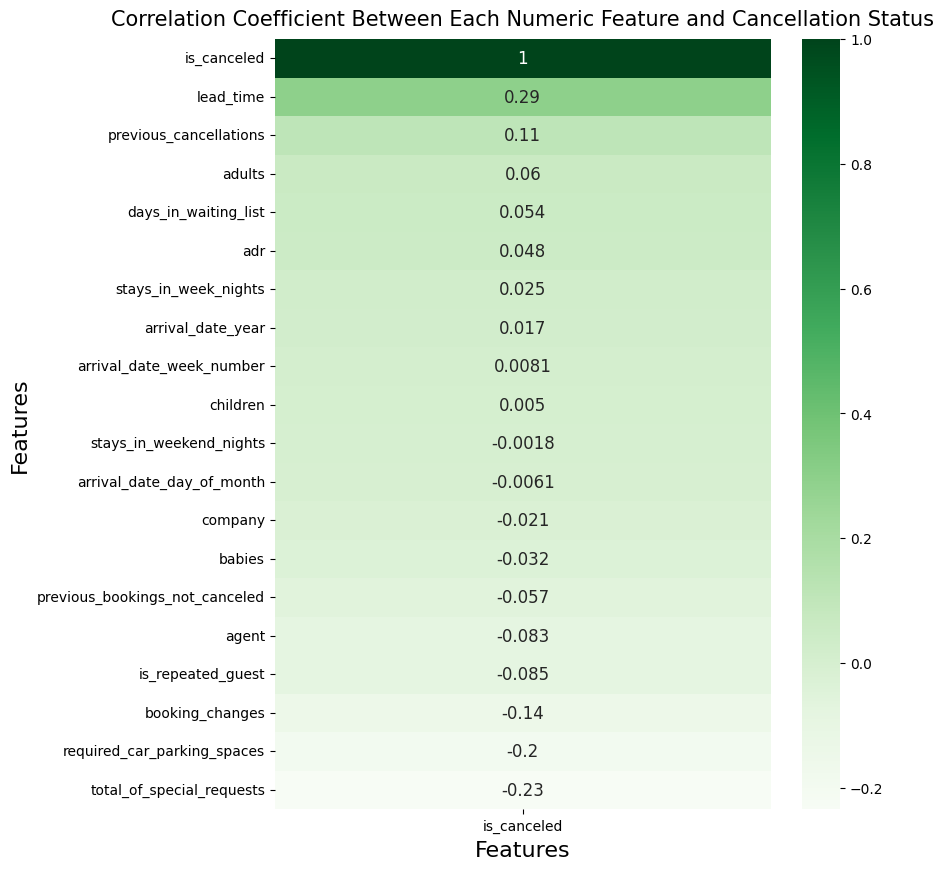

In [ ]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(numeric_data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Greens')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=15,pad=10)
ax.set_xlabel('Features', fontsize = 16,labelpad=5)
ax.set_ylabel('Features', fontsize = 16,labelpad=5)

Cancellations in resort hotel=  0.27763354967548676
Cancellations in city hotel=  0.41726963317786464


Text(0.5, 1.0, 'Total count of bookings and cancellations per hotel')

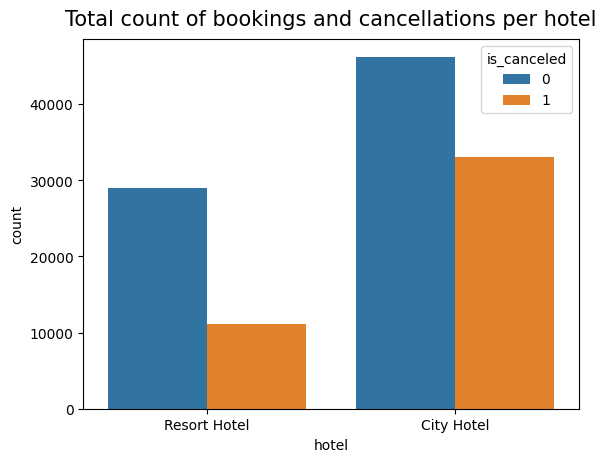

In [ ]:
sns.countplot(data = data, x = 'hotel', hue = 'is_canceled')

resort_canceled = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 1)]
city_canceled = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

print('Cancellations in resort hotel= ', (len(resort_canceled)) / (len(data[data['hotel'] == 'Resort Hotel'])))
print('Cancellations in city hotel= ', (len(city_canceled)) / (len(data[data['hotel'] == 'City Hotel'])))

plt.title("Total count of bookings and cancellations per hotel", fontsize = 15, pad = 10)

REMOVING UNWANTED DATA


In [ ]:
print(len(data[(data['stays_in_weekend_nights'] == 0) & (data['stays_in_week_nights'] == 0)]))

715


In [ ]:
((len(data.loc[(data['children'] != 0) | (data['babies'] != 0)]))/(len(data))) * 100


7.819750397855767

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

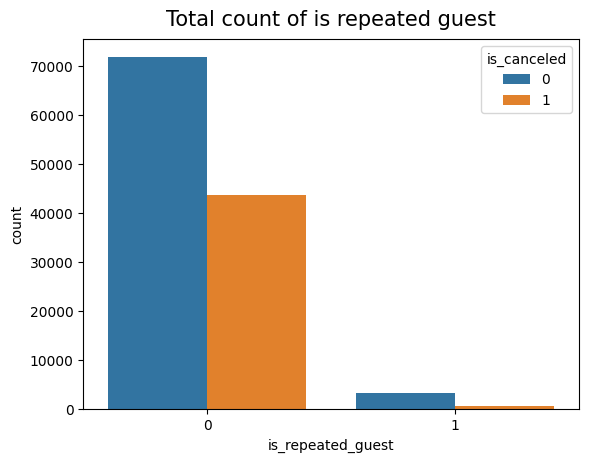

In [ ]:
sns.countplot(data = data, x ='is_repeated_guest', hue ='is_canceled')

new_guest = data[(data['is_repeated_guest'] == 0) & (data['is_canceled']==1)]
old_guest = data[(data['is_repeated_guest'] == 1) & (data['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest)) / (len(data[data['is_repeated_guest'] == 0])))
print('Cancelations among old guests= ', (len(old_guest)) / (len(data[data['is_repeated_guest'] == 1])))

plt.title("Total count of is repeated guest", fontsize = 15, pad = 10)

Text(0.5, 1.0, 'Total count of previous cancellations')

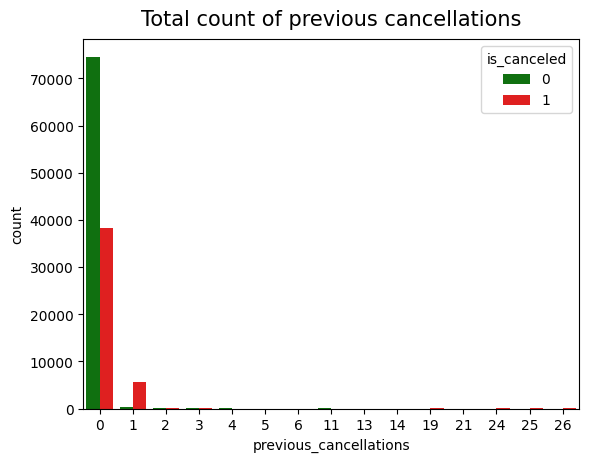

In [ ]:
sns.countplot(data = data, x='previous_cancellations', hue='is_canceled',palette={0: 'green', 1: 'red'})
plt.title("Total count of previous cancellations", fontsize = 15, pad = 10)

In [ ]:
temp = data.loc[data['reserved_room_type'] != data['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True) * 100

,proportion
is_canceled,
0,94.623584
1,5.376416


Text(0.5, 1.0, 'Booking Changes VS Cancellations')

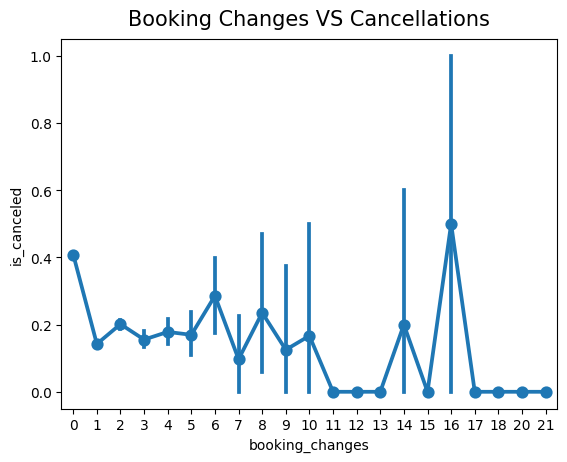

In [ ]:
sns.pointplot(data = data, x = 'booking_changes', y = 'is_canceled')
plt.title("Booking Changes VS Cancellations", fontsize = 15, pad = 10)

Text(0.5, 1.0, 'Days in waiting VS cancellations')

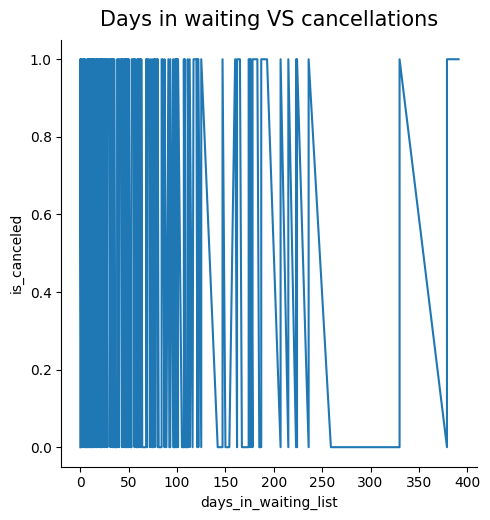

In [ ]:
sns.relplot(data = data, x ='days_in_waiting_list', y = 'is_canceled', kind = 'line', estimator = None)
plt.title("Days in waiting VS cancellations", fontsize = 15, pad = 10)

In [ ]:
year_cancellations = data.groupby(['arrival_date_year'])['is_canceled'].sum()
year_cancellations

,is_canceled
arrival_date_year,
2015,8142
2016,20337
2017,15745


Text(0.5, 1.0, 'Total number of bookings per year')

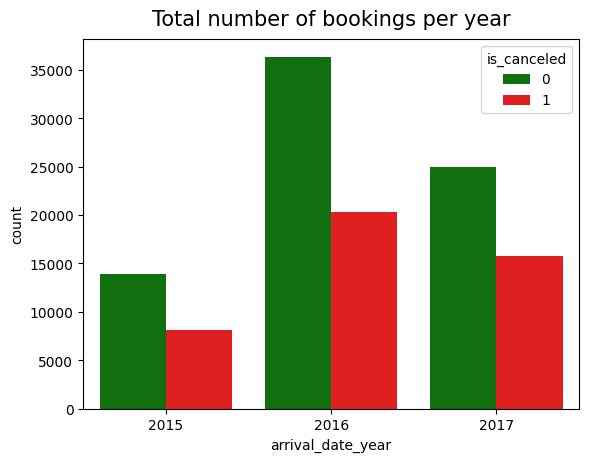

In [ ]:
sns.countplot(data = data, x = 'arrival_date_year', hue = 'is_canceled',palette={0: 'green', 1: 'red'})
plt.title("Total number of bookings per year", fontsize = 15, pad = 10)

In [ ]:
max_bookings = data.groupby(['arrival_date_month'])['is_canceled'].count().sort_values(ascending = False)
print(max_bookings)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: is_canceled, dtype: int64


Text(0.5, 1.0, 'Total Number of bookings per month')

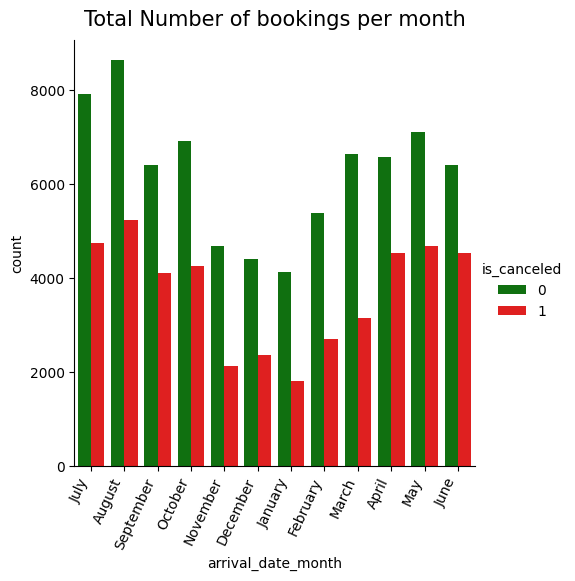

In [ ]:
chart = sns.catplot(data = data, x = 'arrival_date_month', hue = 'is_canceled', kind = 'count',palette={0: 'green', 1: 'red'})
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')  #since all month names would be congested we give this
plt.title("Total Number of bookings per month", fontsize = 15, pad = 10)

In [ ]:
year_count = data.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name = 'count')
year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = data.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name = 'count')
month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                                     count
arrival_date_year arrival_date_year is_canceled           
2015              2015              0            62.984179
                                    1            37.015821
2016              2016              0            64.136703
                                    1            35.863297
2017              2017              0            61.302136
                                    1            38.697864
                                                       count
arrival_date_month arrival_date_month is_canceled           
April              April              0            59.202814
                                      1            40.797186
August             August             0            62.246883
                                      1            37.753117
December           December           0            65.029499
                                      1            34.970501
February           February           0 

<ipython-input-90-7942342a7eea>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
<ipython-input-90-7942342a7eea>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))


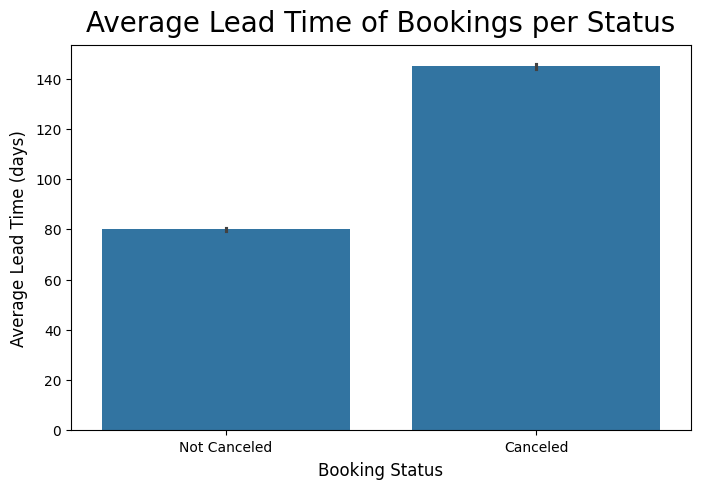

In [ ]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

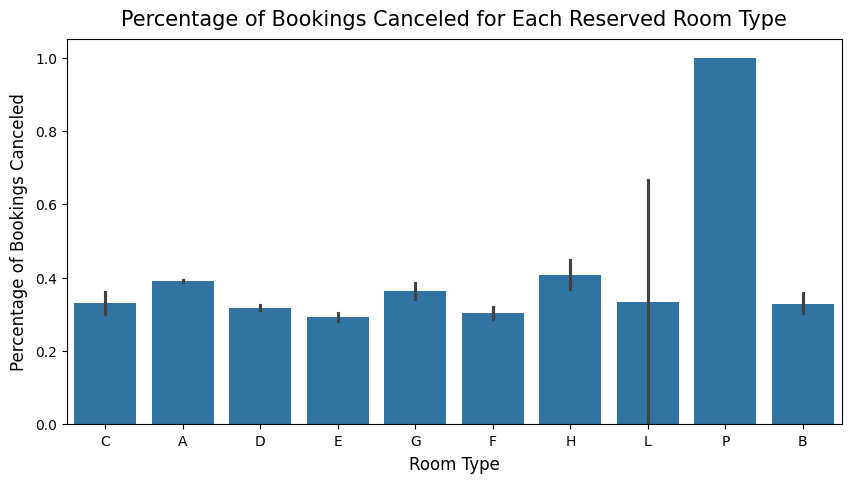

In [ ]:
# Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5))
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 15, pad = 10)
sns.barplot(x=data['reserved_room_type'], y=data['is_canceled'])
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

MULTIVARIATE ANALYSIS


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


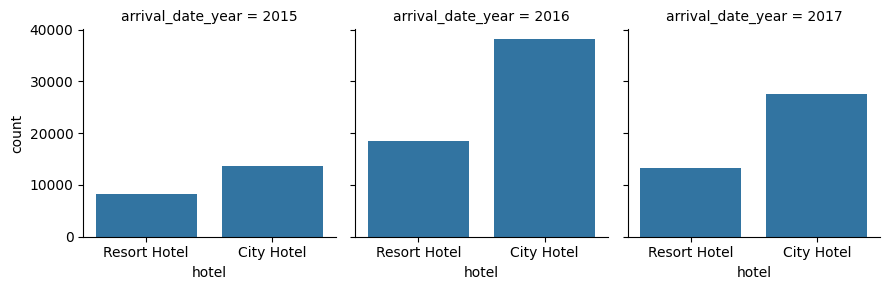

In [ ]:
grid = sns.FacetGrid(data, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

Text(0.5, 1.0, 'Reversed room type booked VS Hotel')

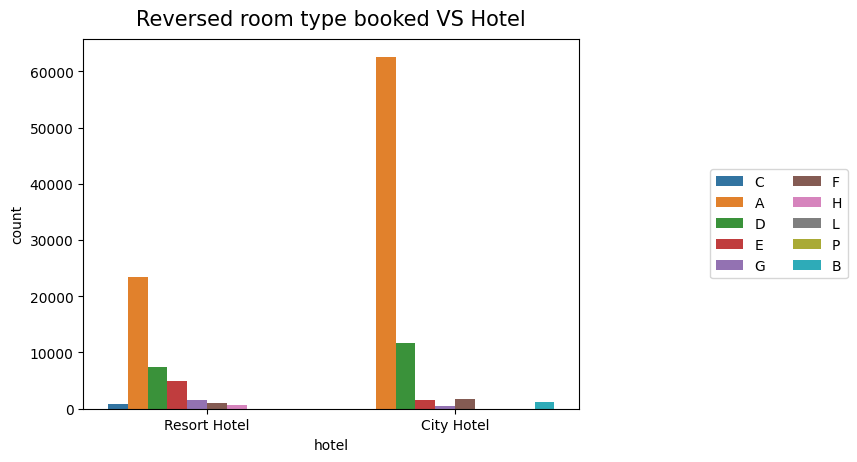

In [ ]:
g = sns.countplot(data = data, x = 'hotel', hue = 'reserved_room_type')
g.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 2) #this line indicates for the box showcasing the color representation
plt.title("Reversed room type booked VS Hotel", fontsize = 15, pad = 10)

In [ ]:
print("TABLE 1")
print(data.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


In [ ]:
group = data.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    customer_type    reservation_status
Contract         Contract         Canceled              30.323847
                                  Check-Out             69.038273
                                  No-Show                0.637880
Group            Group            Canceled               9.532062
                                  Check-Out             89.774697
                                  No-Show                0.693241
Transient        Transient        Canceled              39.678395
                                  Check-Out             59.253680
                                  No-Show                1.067925
Transient-Party  Transient-Party  Canceled              24.554211
                                  Check-Out             74.570132
                                  No-Show                0.875657
dtype: float64

Text(0.5, 1.0, 'Days in waiting VS Hotel')

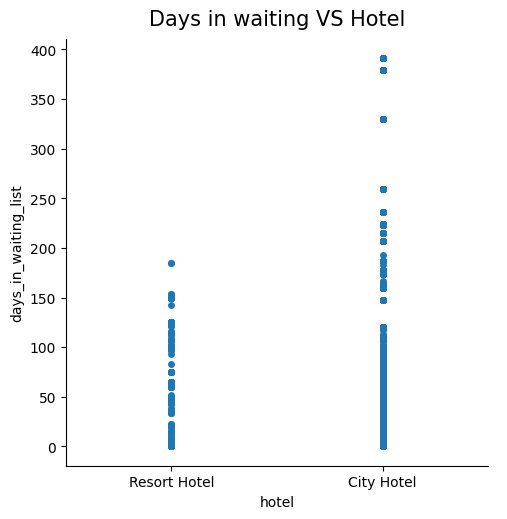

In [ ]:
sns.catplot(data = data, x = 'hotel', y = 'days_in_waiting_list', jitter = False)
plt.title("Days in waiting VS Hotel", fontsize = 15, pad = 10)

In [ ]:
data['country'].value_counts(normalize = True) * 100

,proportion
country,
PRT,40.865587
GBR,10.200838
FRA,8.759314
ESP,7.205934
DEU,6.128576
...,...
DJI,0.000841
BWA,0.000841
HND,0.000841


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


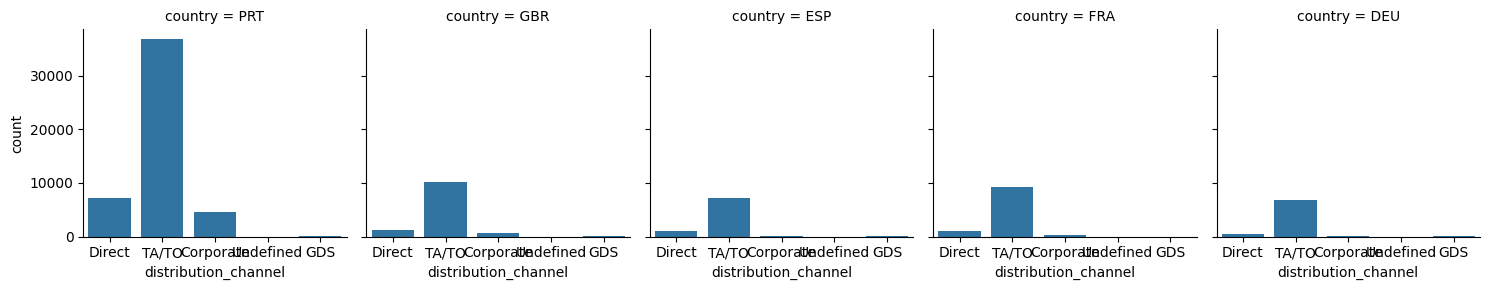

In [ ]:
temp = data.loc[(data['country'] == 'PRT') | (data['country'] == 'GBR') | (data['country'] == 'FRA') | (data['country'] == 'ESP') | (data['country'] == 'DEU')]
grid = sns.FacetGrid(temp, col = 'country')
grid.map(sns.countplot, 'distribution_channel')

FEATURE ENGINEERING (ML MODEL)

In [ ]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data.arrival_date_month = data.arrival_date_month.map(month_map).astype(int)

In [ ]:
data['arrival_date'] = data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)
data['arrival_date'].head()

,arrival_date
0,2015-7-1
1,2015-7-1
2,2015-7-1
3,2015-7-1
4,2015-7-1


In [ ]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data['change_in_room'] = data.apply(roomChange, axis=1)

In [ ]:
data['children'] = data['children'].fillna(0)
data['offspring'] = (data['children'] + data['babies']).astype(int)

In [ ]:
data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

In [ ]:
data['country'].fillna(data['country'].mode()[0], inplace = True)
data['agent'].fillna(data['agent'].mode()[0], inplace = True)
data['company'].fillna(data['company'].mode()[0], inplace = True)

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [ ]:
data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] = data['stay_duration'] / np.timedelta64(1, 'D')
data['stay_duration'] = data['stay_duration'].astype(int)

In [ ]:
for i in range(len(data)):
    if data.loc[i, 'country'] == 'PRT':
        data.at[i, 'country'] = 1
    elif data.loc[i, 'country'] == 'GBR':
        data.at[i, 'country'] = 2
    else:
        data.at[i, 'country'] = 0

In [ ]:
for i in range(len(data)):
    if data.loc[i, 'stay_duration'] < 0:
        data.at[i, 'stay_duration'] = -1

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'change_in_room', 'offspring', 'total_bookings', 'stay_duration'],
      dtype='object')

In [ ]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])

In [ ]:
data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis = 1, inplace = True)

IMPORT THE PACKAGES

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

In [ ]:
# Separate features and predicted value
X = data.drop(columns=['is_canceled'], axis=1)
y = data['is_canceled']

TRAIN TEST SPLIT

In [ ]:
# 70 % for training, 30 % for validation

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83573, 50), (83573,), (17909, 50), (17909,))

SCALING

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

PREDICTION USING DIFFERENT MACHINE LEARNING MODELS

BASELINE MODEL

In [ ]:
# Checking baseline model score
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f'Baseline Training Score: {dummy.score(X_train, y_train)}')
print(f'Baseline Testing Score: {dummy.score(X_test, y_test)}')

Baseline Training Score: 0.6295813241118543
Baseline Testing Score: 0.6295717237143336


LOGISTIC REGRESSION

In [ ]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'],
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

In [ ]:
# Scoring
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.999270099194716
Best Testing Accuracy: 0.9992741079903958
Cross-val-score: 0.9990451461596448


In [ ]:
#Logistic Regression

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
confusion_matrix(y_test, logreg_pred)

Average cross validation score: 0.991
Test accuracy: 0.991
F1 score: 0.987


array([[11268,     7],
       [  159,  6475]])

DECISION TREE CLASSIFIER

In [ ]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
tree_pred = tree.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[11170   105]
 [    0  6634]]


RANDOM FOREST CLASSIFIER

In [ ]:
#Random Forest

rforest= RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
rforest_pred = rforest.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rforest_pred)))
print(confusion_matrix(y_test, rforest_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 1.000
[[11274     1]
 [    0  6634]]


ADABOOST BOOSTED CLASSIFIER

In [ ]:
#Adaboost Classifier
ada = AdaBoostClassifier().fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv = 5)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

Average cross validation score: 0.999
Test accuracy: 1.000
F1 score: 1.000
[[11272     3]
 [    1  6633]]


In [ ]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [ ]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.9983008807782785
Test score: 0.997
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9981931966520495
Test score: 0.998


In [ ]:
#Gradient Boosted Classifier
param_grid = {'max_depth':[1,2,5], 'learning_rate':[1,0.1,0.001]}
run_model(GradientBoostingClassifier(), GradientBoostingClassifier(learning_rate=0.001), param_grid)

Before feature selection:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9995453056902006
Test score: 1.000
After feature selection
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9995213743730593
Test score: 1.000
